<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Forecasting_for_RES/blob/main/HPP_LW2_inflowZeya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Метод линейной регрессии

Регрессия – это условное математическое ожидание непрерывной зависимой (выходной) переменной при наблюдаемых значениях независимых (входных) переменных. Линейная регрессия основана на гипотезе, что искомая зависимость – линейная. Каждая независимая переменная вносит аддитивный вклад в результирующее значение с некоторым весом, называемом коэффициентом регрессии.

Если установлена тесная линейная корреляция между переменными, то можно вывести уравнение прямой и использовать её для прогнозирования поведения зависимой переменной в будущем. Этот процесс носит название ЛИНЕЙНОЙ РЕГРЕССИИ.

Линейная модель уравнения регрессии строится по методу наименьших квадратов. Этот критерий минимизирует сумму квадратов вертикальных отклонений точек от прямой регрессии.

Достоинства линейной регрессии:
*   Скорость и простота получения модели.
*   Интерпретируемость модели. Линейная модель является прозрачной и понятной для аналитика.


## Метод полиномиальной регрессии

Полиномиальная регрессия означает приближение данных (xi,yi) полиномом k–й степени A(x)=a+b×x+c×x^2+d×x^3+…+h×x^k. При k=1 полином является прямой линией, при k=2 – параболой, при k=3 – кубической параболой и т. д.

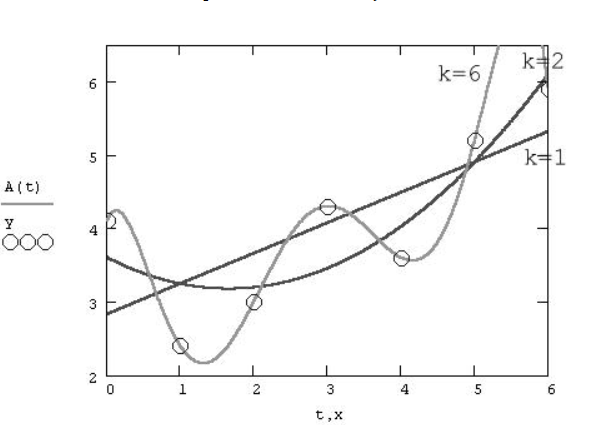

## Описание параметров оценки качества прогнозной модели

Наиболее часто на практике для анализа адекватности модели прогноза исследуемым различным процессам используются абсолютные показатели, позволяющие количественно определить величину ошибки моделирования в единицах измерения прогнозируемого объекта. К ним относятся:



*   абсолютная ошибка, определяемая как разность между фактическим значением показателя и его расчётным значением






image.png

*   средняя абсолютная ошибка




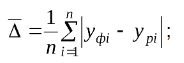

*   среднеквадратическая ошибка

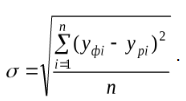

Следует отметить, что абсолютные показатели малопригодны для сравнения и анализа точности моделирования разнородных объектов, так как их значения существенно зависят от масштаба измерения исследуемых явлений. В этих случаях используются относительные показатели:

*   относительная ошибка




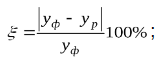




*   средняя относительная ошибка

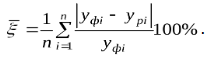

## Импорт библиотек

In [ ]:
#Для работы с данными
import pandas as pd
import numpy as np

#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sn

#Для моделей регрессии
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn import tree

#Для разделения данных на выборки
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

#Для оценивания прогноза (метрики точности)
import sklearn.metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error

In [ ]:
def MAPE(y_t, y_p):
  y_t, y_p = np.array(y_t), np.array(y_p)
  Err=np.mean(np.abs((y_t - y_p)/y_t) * 100)
  return (Err)

In [ ]:
inflow_data2 = pd.read_excel('/content/drive/MyDrive/Гидроэнергетика/Исходные данные ЛР2.xlsx', sheet_name= 'В3.Зея')
data = pd.DataFrame(data=inflow_data2)
data

,Месяцы/годы,1,2,3,4,5,6,7,8,9,10,11,12
0,1902,11.60,7.09,6.35,10.20,2220,772,367,2430,970,515,80.5,51.0
1,1903,9.10,7.33,5.95,6.33,2450,968,1700,2310,1310,415,78.4,42.0
2,1904,9.12,7.83,6.94,26.00,2060,1170,493,941,1580,776,124.0,43.7
3,1905,8.57,6.05,5.94,1250.00,2210,2690,1430,1890,1160,310,78.4,48.0
4,1906,18.20,7.76,6.55,22.00,661,1320,1120,3020,787,138,61.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1964,48.00,16.00,14.00,121.00,1610,2130,2910,1700,3100,748,186.0,109.0
61,1965,14.00,7.00,7.00,84.00,1850,1100,987,802,1650,275,68.0,30.0
62,1966,12.00,8.00,6.00,8.00,1620,2580,2300,1050,516,503,60.0,39.0
63,1967,18.00,8.00,7.00,30.00,2660,1360,2730,716,664,323,120.0,42.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Установка первого столбца в качестве индекса строк
data.set_index(data.iloc[:, 0], inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data

,1,2,3,4,5,6,7,8,9,10,11,12
Месяцы/годы,,,,,,,,,,,,
1902,11.60,7.09,6.35,10.20,2220,772,367,2430,970,515,80.5,51.0
1903,9.10,7.33,5.95,6.33,2450,968,1700,2310,1310,415,78.4,42.0
1904,9.12,7.83,6.94,26.00,2060,1170,493,941,1580,776,124.0,43.7
1905,8.57,6.05,5.94,1250.00,2210,2690,1430,1890,1160,310,78.4,48.0
1906,18.20,7.76,6.55,22.00,661,1320,1120,3020,787,138,61.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1964,48.00,16.00,14.00,121.00,1610,2130,2910,1700,3100,748,186.0,109.0
1965,14.00,7.00,7.00,84.00,1850,1100,987,802,1650,275,68.0,30.0
1966,12.00,8.00,6.00,8.00,1620,2580,2300,1050,516,503,60.0,39.0


In [ ]:
# Преобразование DataFrame в Series
series = data.stack()
print(series)

Месяцы/годы    
1902         1       11.60
             2        7.09
             3        6.35
             4       10.20
             5     2220.00
                    ...   
1968         8     1780.00
             9     3000.00
             10     770.00
             11     132.00
             12      38.00
Length: 780, dtype: float64


In [ ]:
data.dtypes

1     float64
2     float64
3     float64
4     float64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11    float64
12    float64
dtype: object

In [ ]:
# Создание новой серии со сдвинутыми значениями
data_shift = series.shift(-1)[0:]
data_shift = data_shift.iloc[:-1]
data_shift

Месяцы/годы    
1902         1        7.09
             2        6.35
             3       10.20
             4     2220.00
             5      772.00
                    ...   
1968         7     1780.00
             8     3000.00
             9      770.00
             10     132.00
             11      38.00
Length: 779, dtype: float64

In [ ]:
series = series.iloc[:-1]

In [ ]:
X = data_shift
y = series

In [ ]:
X_train = X.iloc[0:round(len(data_shift)*0.8)]
y_train = y.iloc[0:round(len(series)*0.8)]
X_test = X.iloc[round(len(data_shift)*0.8):]
y_test = y.iloc[round(len(series)*0.8):]
#сохраняем тестовую выборку на всякий случай
y_test.to_excel('/y_test.xlsx')
X_test.to_excel('/X_test.xlsx')

In [ ]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

##Линейная регрессия

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
scoring  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores = cross_validate(lin_reg, X_train, y_train, scoring = scoring, cv=ShuffleSplit(n_splits=4))
y_pred = lin_reg.predict(X_test)
print('Cross-Validation errors')
DF_reg = pd.DataFrame(scores)
display(DF_reg)
print('Test errors')
print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred))

Cross-Validation errors


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.001045,0.001277,0.235810,-646294.593524,-521.675670,-2578.487363
1,0.000818,0.000901,0.217829,-397486.770910,-476.999270,-1901.195220
2,0.001021,0.000896,0.461971,-402762.087439,-467.643725,-1923.836281
3,0.000751,0.001213,0.380539,-346604.368023,-441.862733,-1594.784166


Test errors
Mean squared error on test_set: 743977.3804
Root Mean Square Error on test_set: 862.5412
Root Absolute Percented Error on test_set: 2800.1291
R2  on test_set: 0.2770


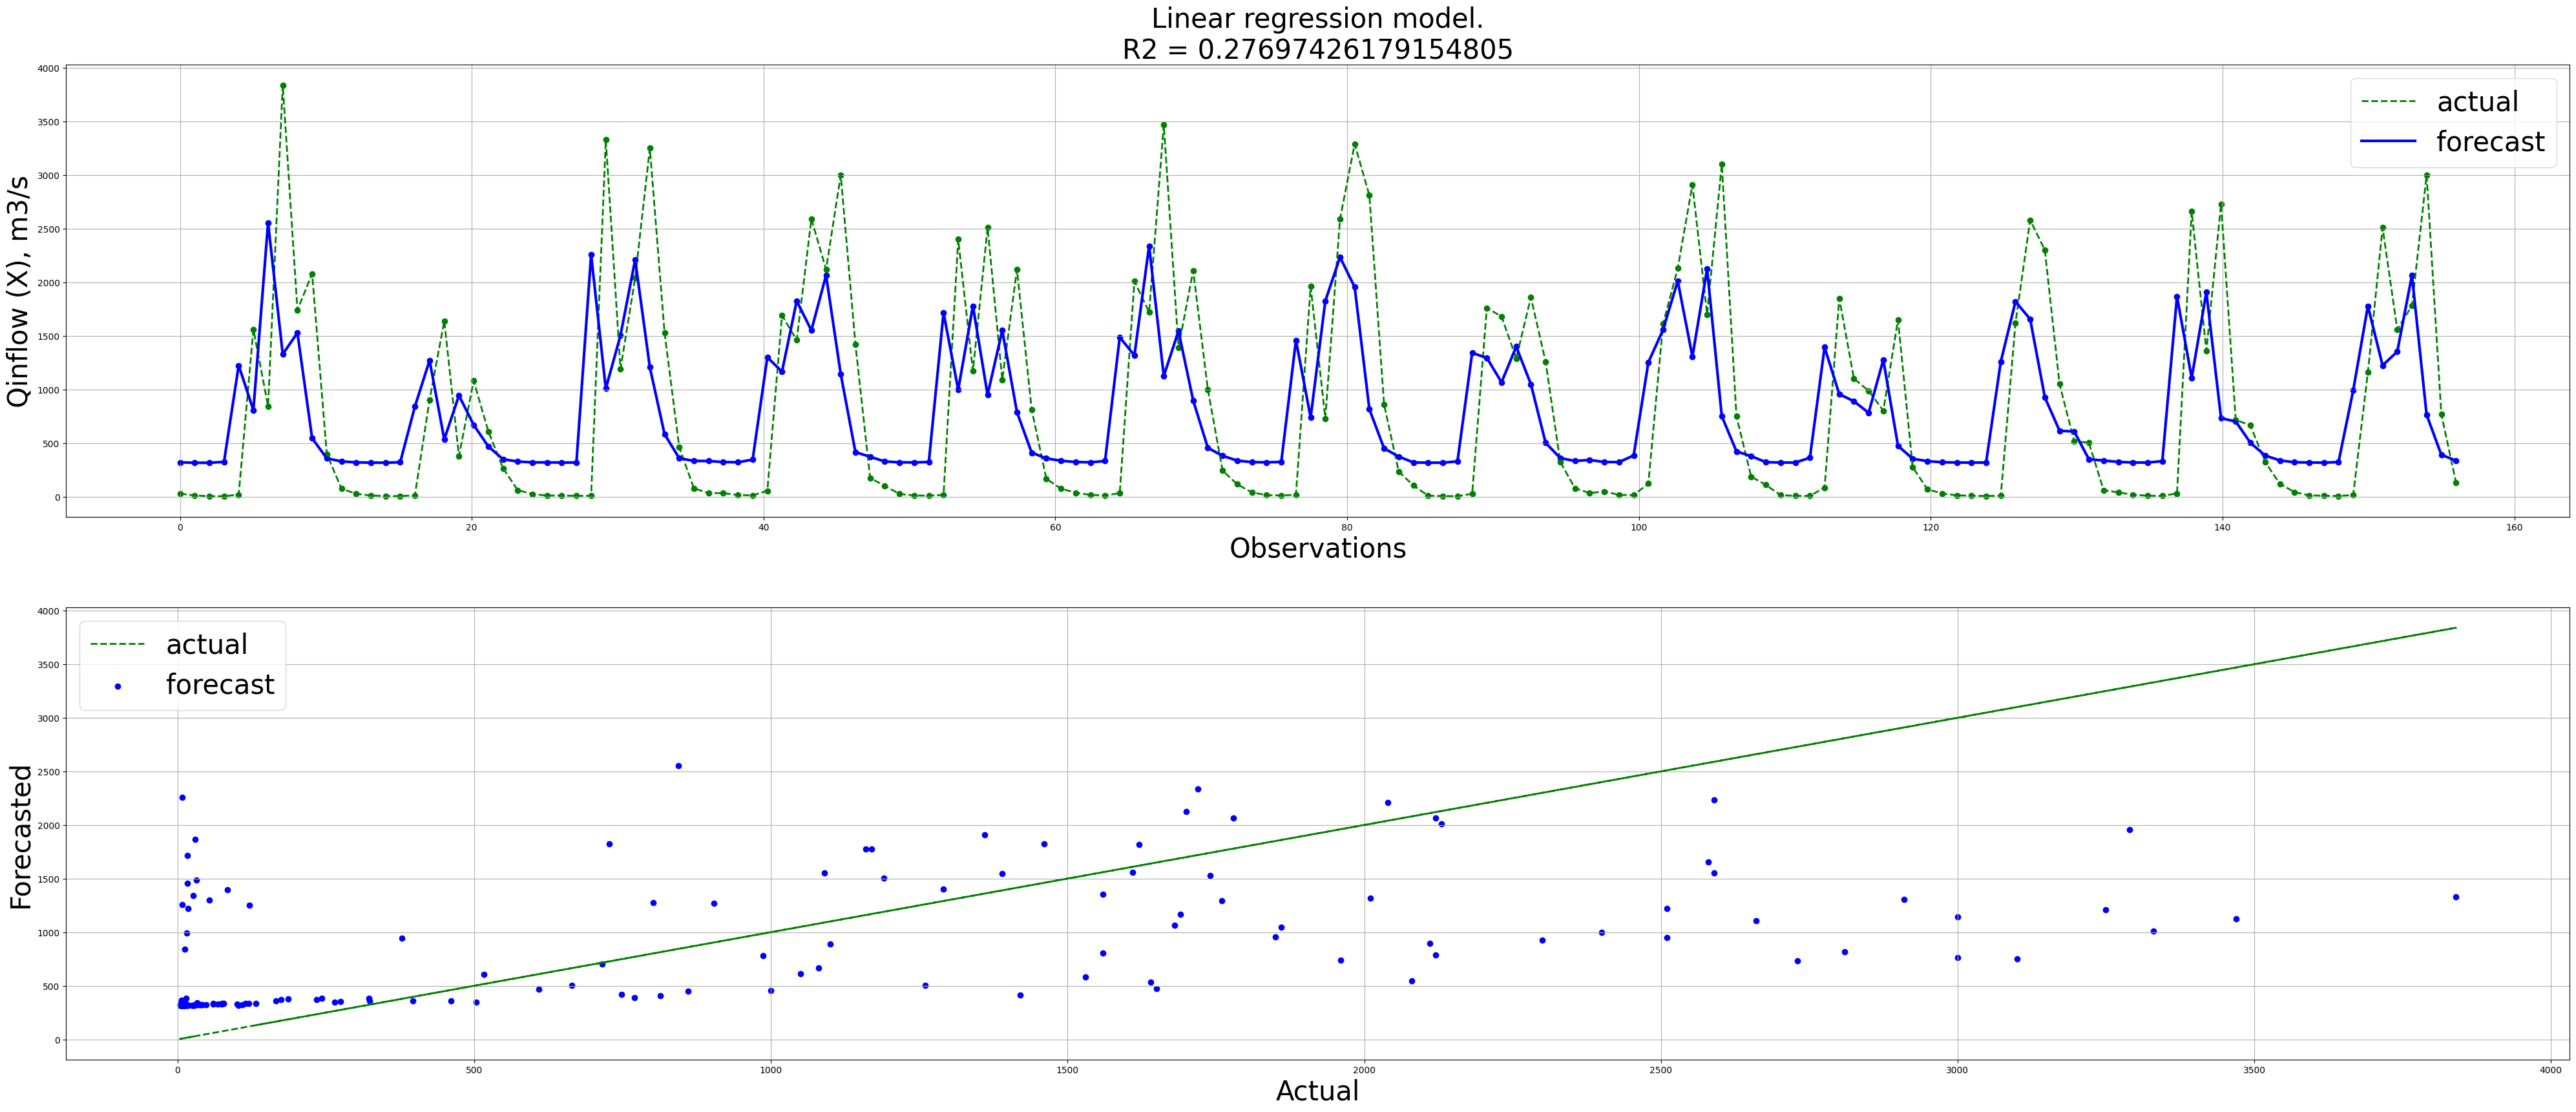

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Linear regression model.\nR2 = {r2_score(y_test,y_pred)}', fontsize=30)
plt.scatter(x, y_pred, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

##Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures as poly
from sklearn.pipeline import Pipeline

In [ ]:
PF = poly(degree=2, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.001758,0.001137,0.264470,-645241.456726,-576.592157,-2278.563364
1,0.001565,0.001306,0.478168,-396151.514182,-440.285909,-2114.518391
2,0.001464,0.001010,0.312886,-659512.057791,-550.726691,-2283.662718
3,0.001390,0.001022,0.437883,-462256.160128,-485.892162,-2287.064535
4,0.001385,0.001090,0.398719,-368199.694637,-426.251507,-2100.882247


Mean squared error on test_set: 655795.1639
Root Mean Square Error on test_set: 809.8118
Root Absolute Percented Error on test_set: 2770.2455
R2  on test_set: 0.3627


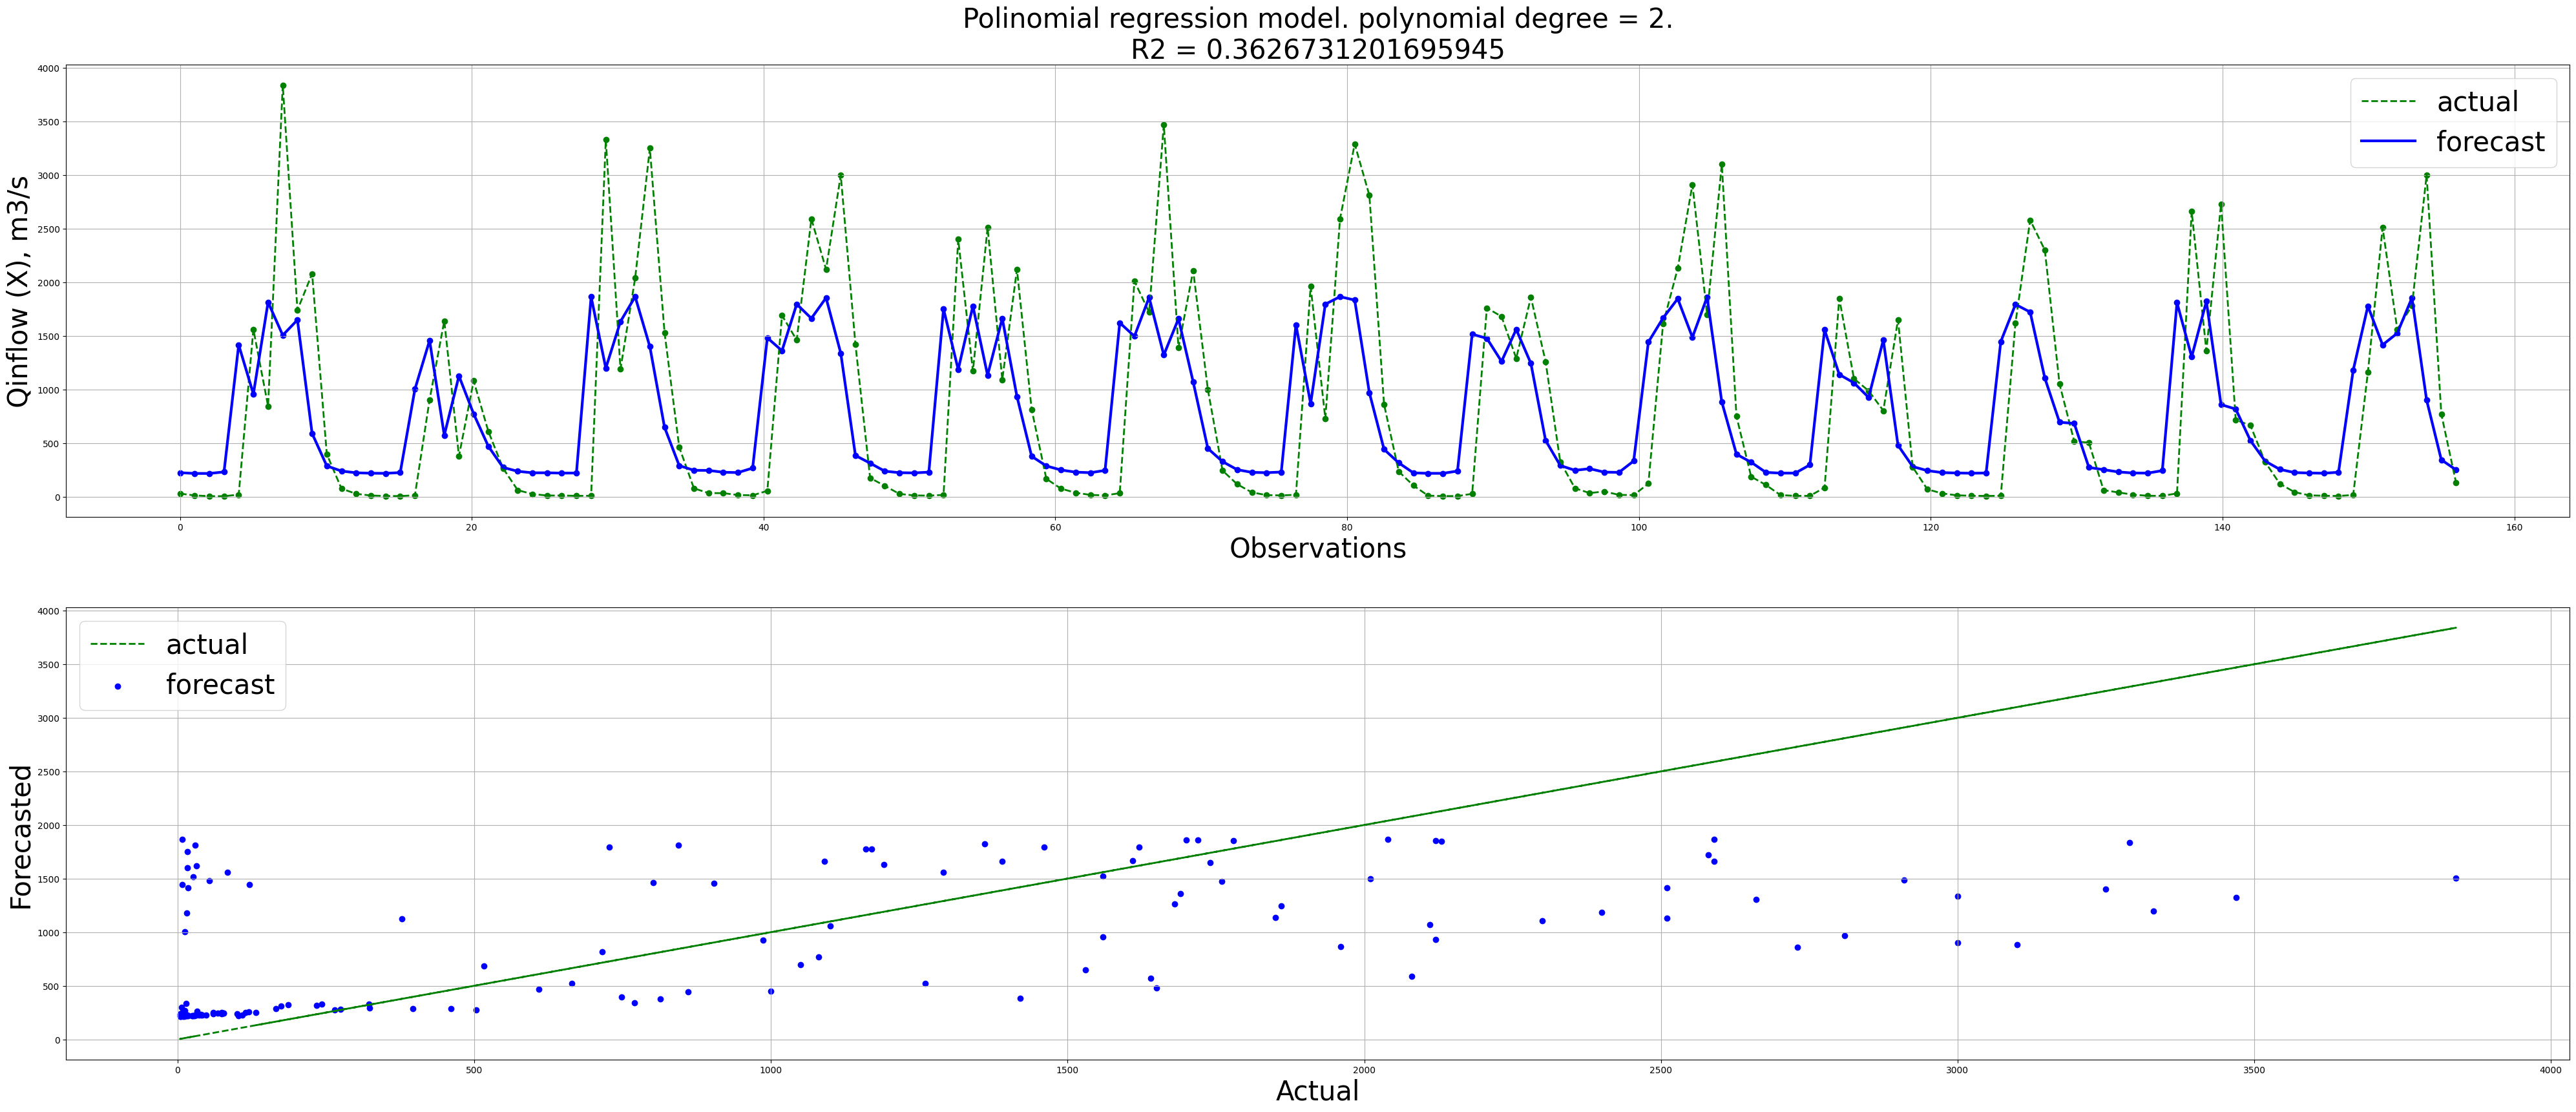

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=3, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.003793,0.001808,0.564851,-3.569416e+05,-379.693284,-2183.683794
1,0.002869,0.001873,0.267877,-5.812075e+05,-539.804855,-1592.293341
2,0.002615,0.001816,-1.060895,-1.657697e+06,-716.823783,-7950.417657
3,0.002712,0.001881,0.444979,-4.128524e+05,-453.472586,-1517.129288
4,0.001747,0.001457,0.321914,-4.618368e+05,-495.535098,-1671.034142


Mean squared error on test_set: 566077.2432
Root Mean Square Error on test_set: 752.3810
Root Absolute Percented Error on test_set: 2628.8887
R2  on test_set: 0.4499


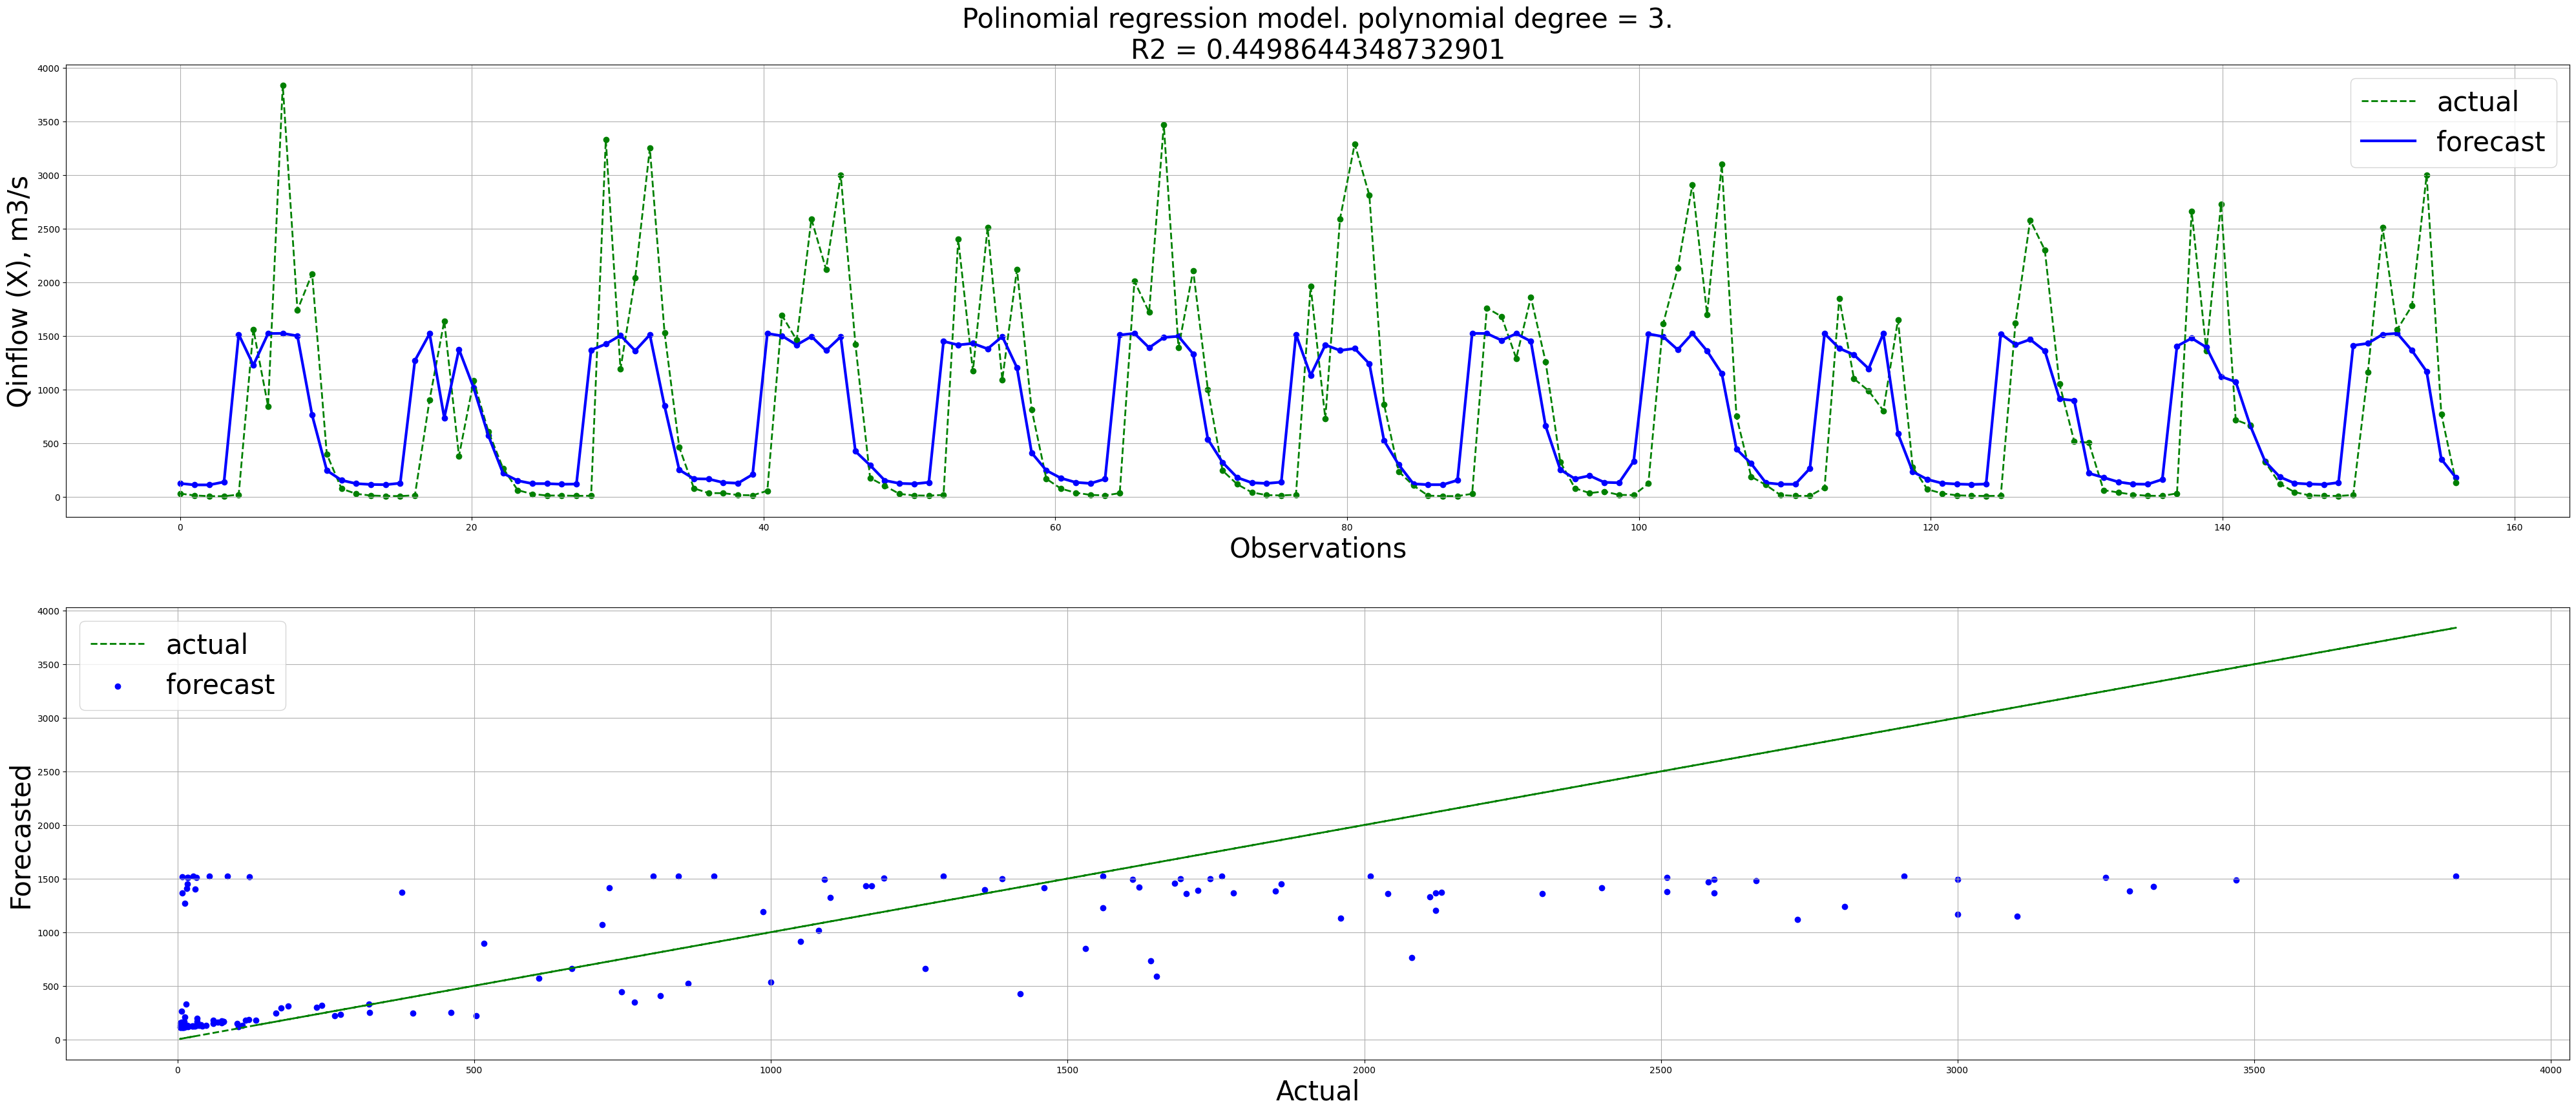

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=4, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.002742,0.001323,0.485236,-341437.090849,-396.563324,-1395.573707
1,0.001616,0.001106,0.477729,-525866.518981,-446.087103,-2399.240025
2,0.001464,0.001037,0.610218,-381458.467622,-372.934353,-2076.077427
3,0.001415,0.001060,0.061394,-426647.339928,-409.190421,-1807.029924
4,0.001440,0.001032,0.351340,-439139.573708,-402.212316,-2605.607110


Mean squared error on test_set: 538304.5850
Root Mean Square Error on test_set: 733.6924
Root Absolute Percented Error on test_set: 2644.5011
R2  on test_set: 0.4769


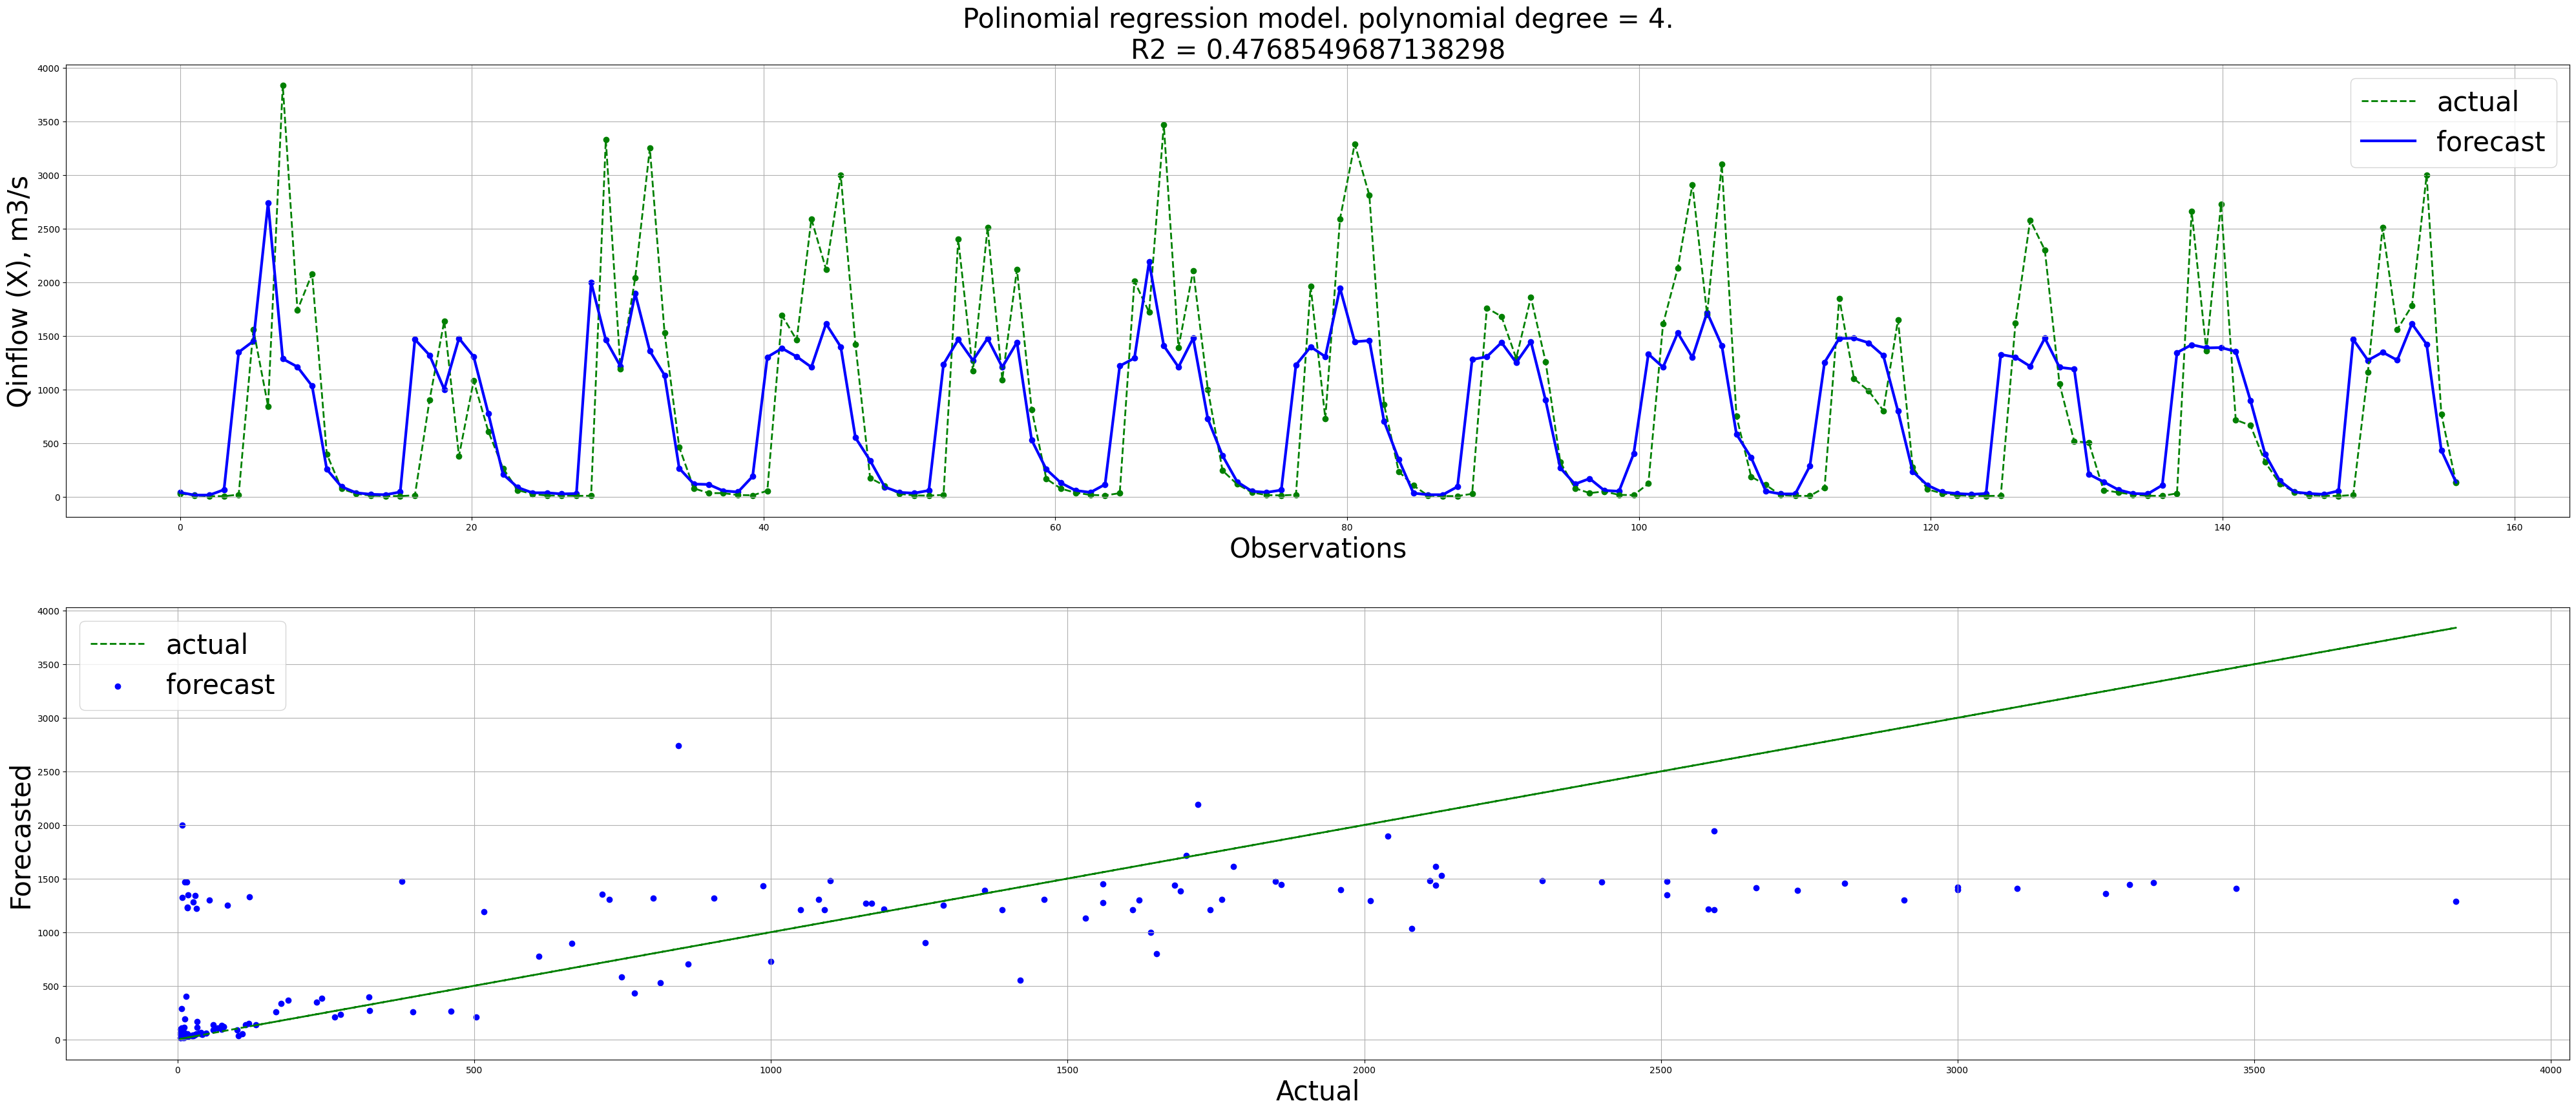

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=5, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.006672,0.005459,0.498751,-423155.452782,-424.800990,-1997.143369
1,0.002630,0.001475,0.662483,-364890.278718,-375.708754,-2421.393938
2,0.002764,0.001602,0.674275,-278940.068771,-329.630519,-1444.394167
3,0.003785,0.004019,0.393962,-588332.969469,-497.896172,-3156.712608
4,0.002194,0.001567,0.465301,-410975.110799,-372.544520,-2327.244089


Mean squared error on test_set: 506319.7256
Root Mean Square Error on test_set: 711.5615
Root Absolute Percented Error on test_set: 2737.1616
R2  on test_set: 0.5079


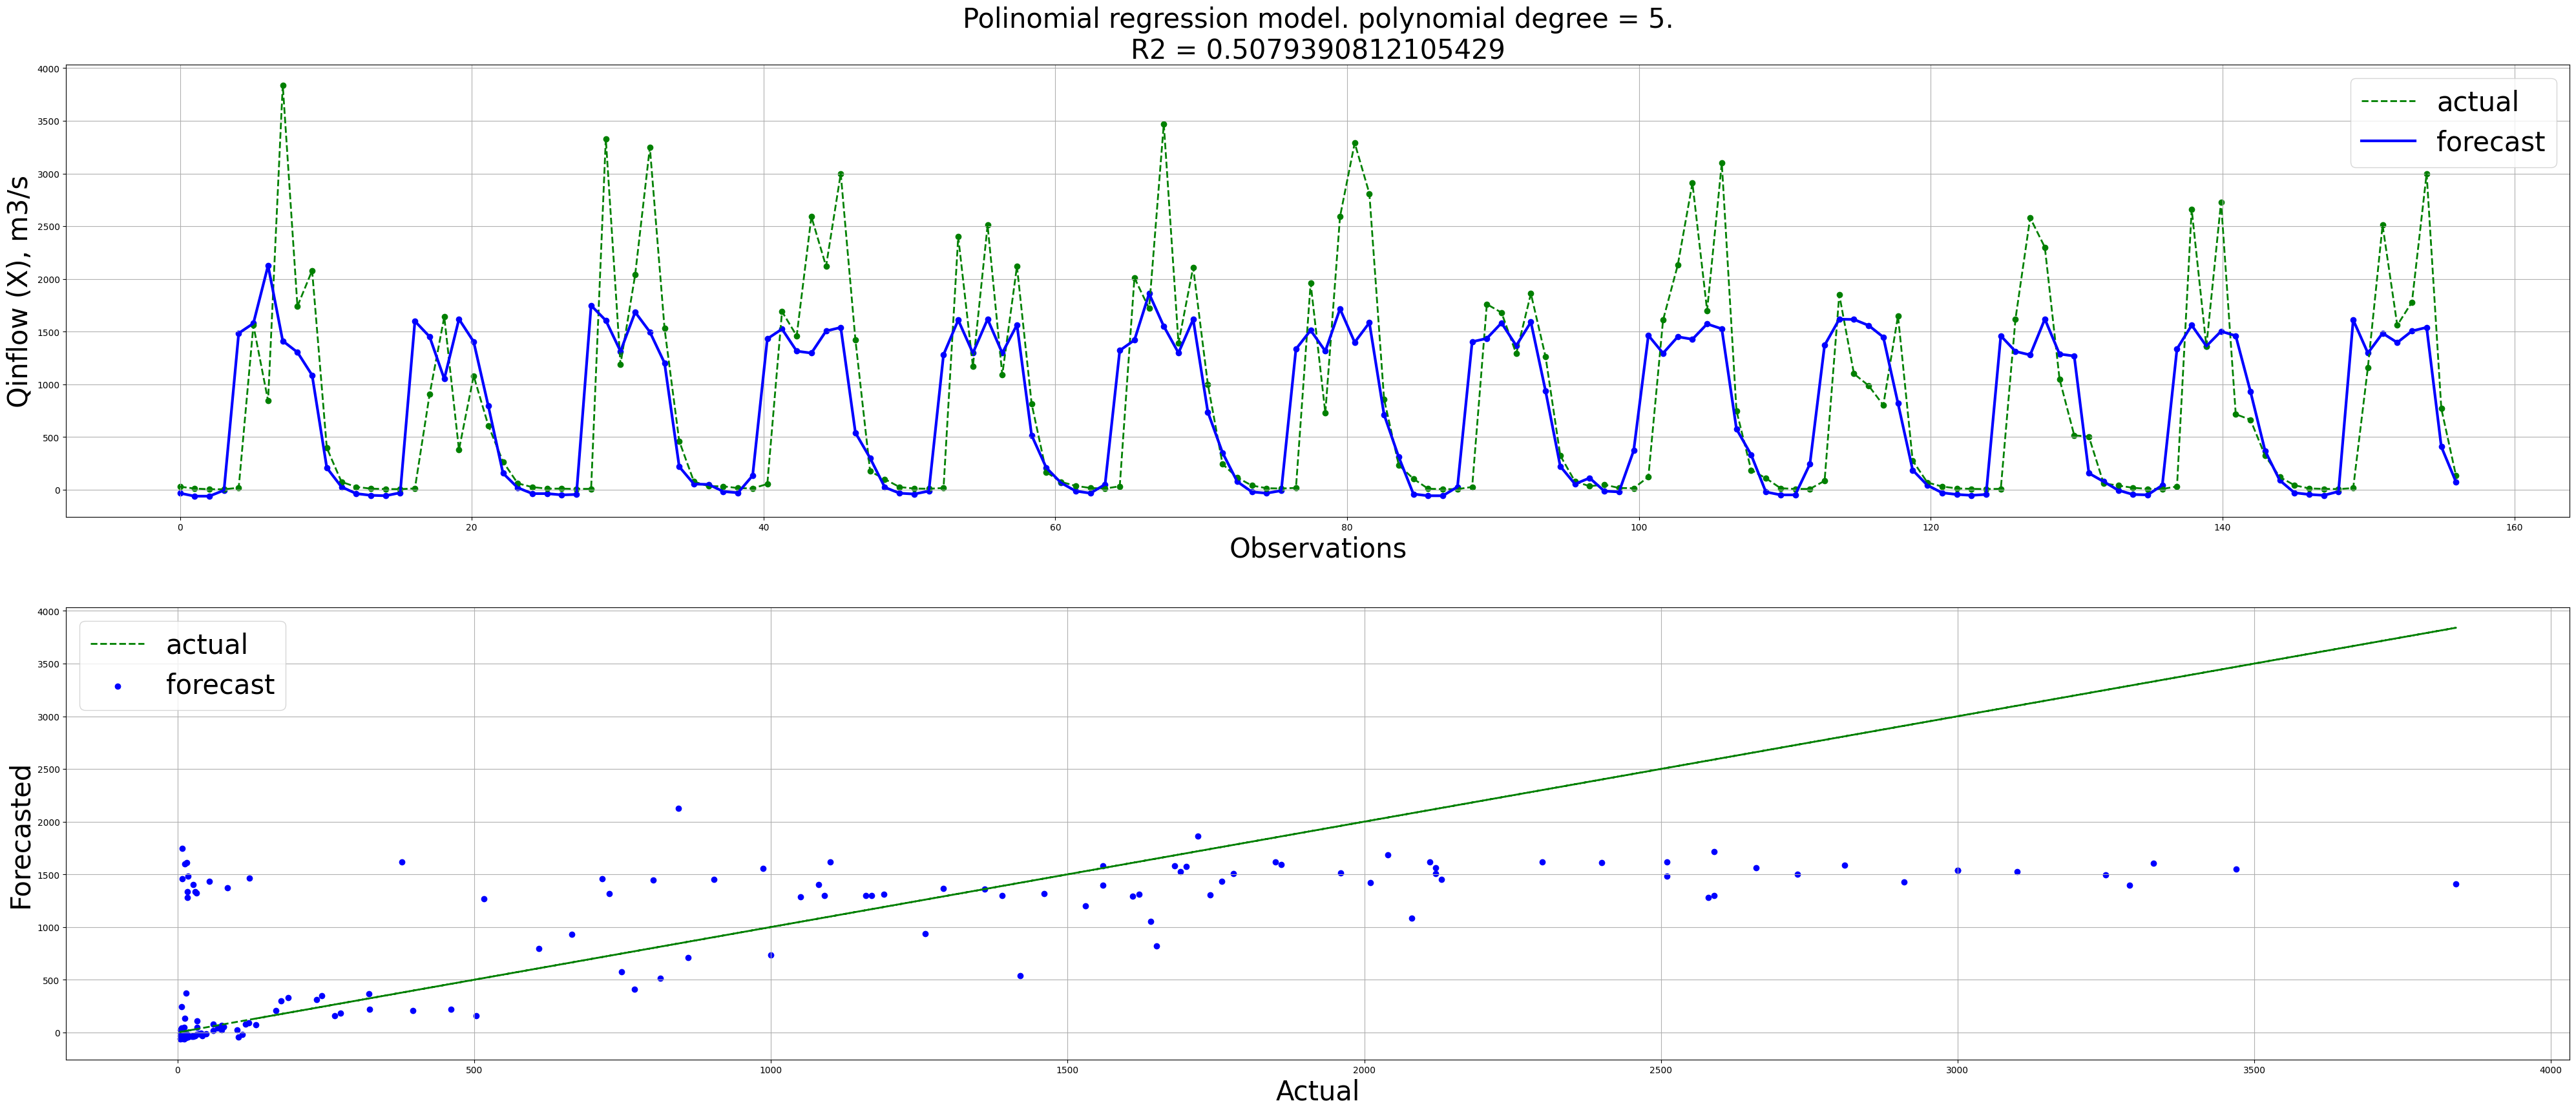

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
PF = poly(degree=6, include_bias=True, interaction_only=False)
#Rid = Ridge(alpha=0.1)
LR = LinearRegression()
pipe = Pipeline([('polynomial_features', PF), ('lr', LR)])
pipe.fit(X_train, y_train)
scoring_pipe  = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}
scores_pipe = cross_validate(pipe, X_train, y_train, scoring = scoring_pipe, cv=ShuffleSplit(n_splits=5))
y_pred_pipe = pipe.predict(X_test)
print('Cross-Validation error')
DF_reg_pipe = pd.DataFrame(scores_pipe)
display(DF_reg_pipe)

print('Mean squared error on test_set: %.4f' % mse(y_test,y_pred_pipe))
print('Root Mean Square Error on test_set: %.4f' % mse(y_test,y_pred_pipe, squared=False))
print('Root Absolute Percented Error on test_set: %.4f' % MAPE(y_test,y_pred_pipe))
print('R2  on test_set: %.4f' %  r2_score(y_test,y_pred_pipe))

Cross-Validation error


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_Max
0,0.003180,0.002295,0.239196,-6.455630e+05,-627.367536,-2647.372109
1,0.002938,0.002032,-0.172395,-1.231387e+06,-633.194381,-6421.748821
2,0.017218,0.002187,-45.380194,-4.563697e+07,-1445.702300,-53137.319981
3,0.002800,0.002024,-0.732245,-1.370299e+06,-684.936768,-6962.132994
4,0.002575,0.015131,0.434958,-6.770490e+05,-620.309277,-2717.229959


Mean squared error on test_set: 754238.5496
Root Mean Square Error on test_set: 868.4691
Root Absolute Percented Error on test_set: 2692.4625
R2  on test_set: 0.2670


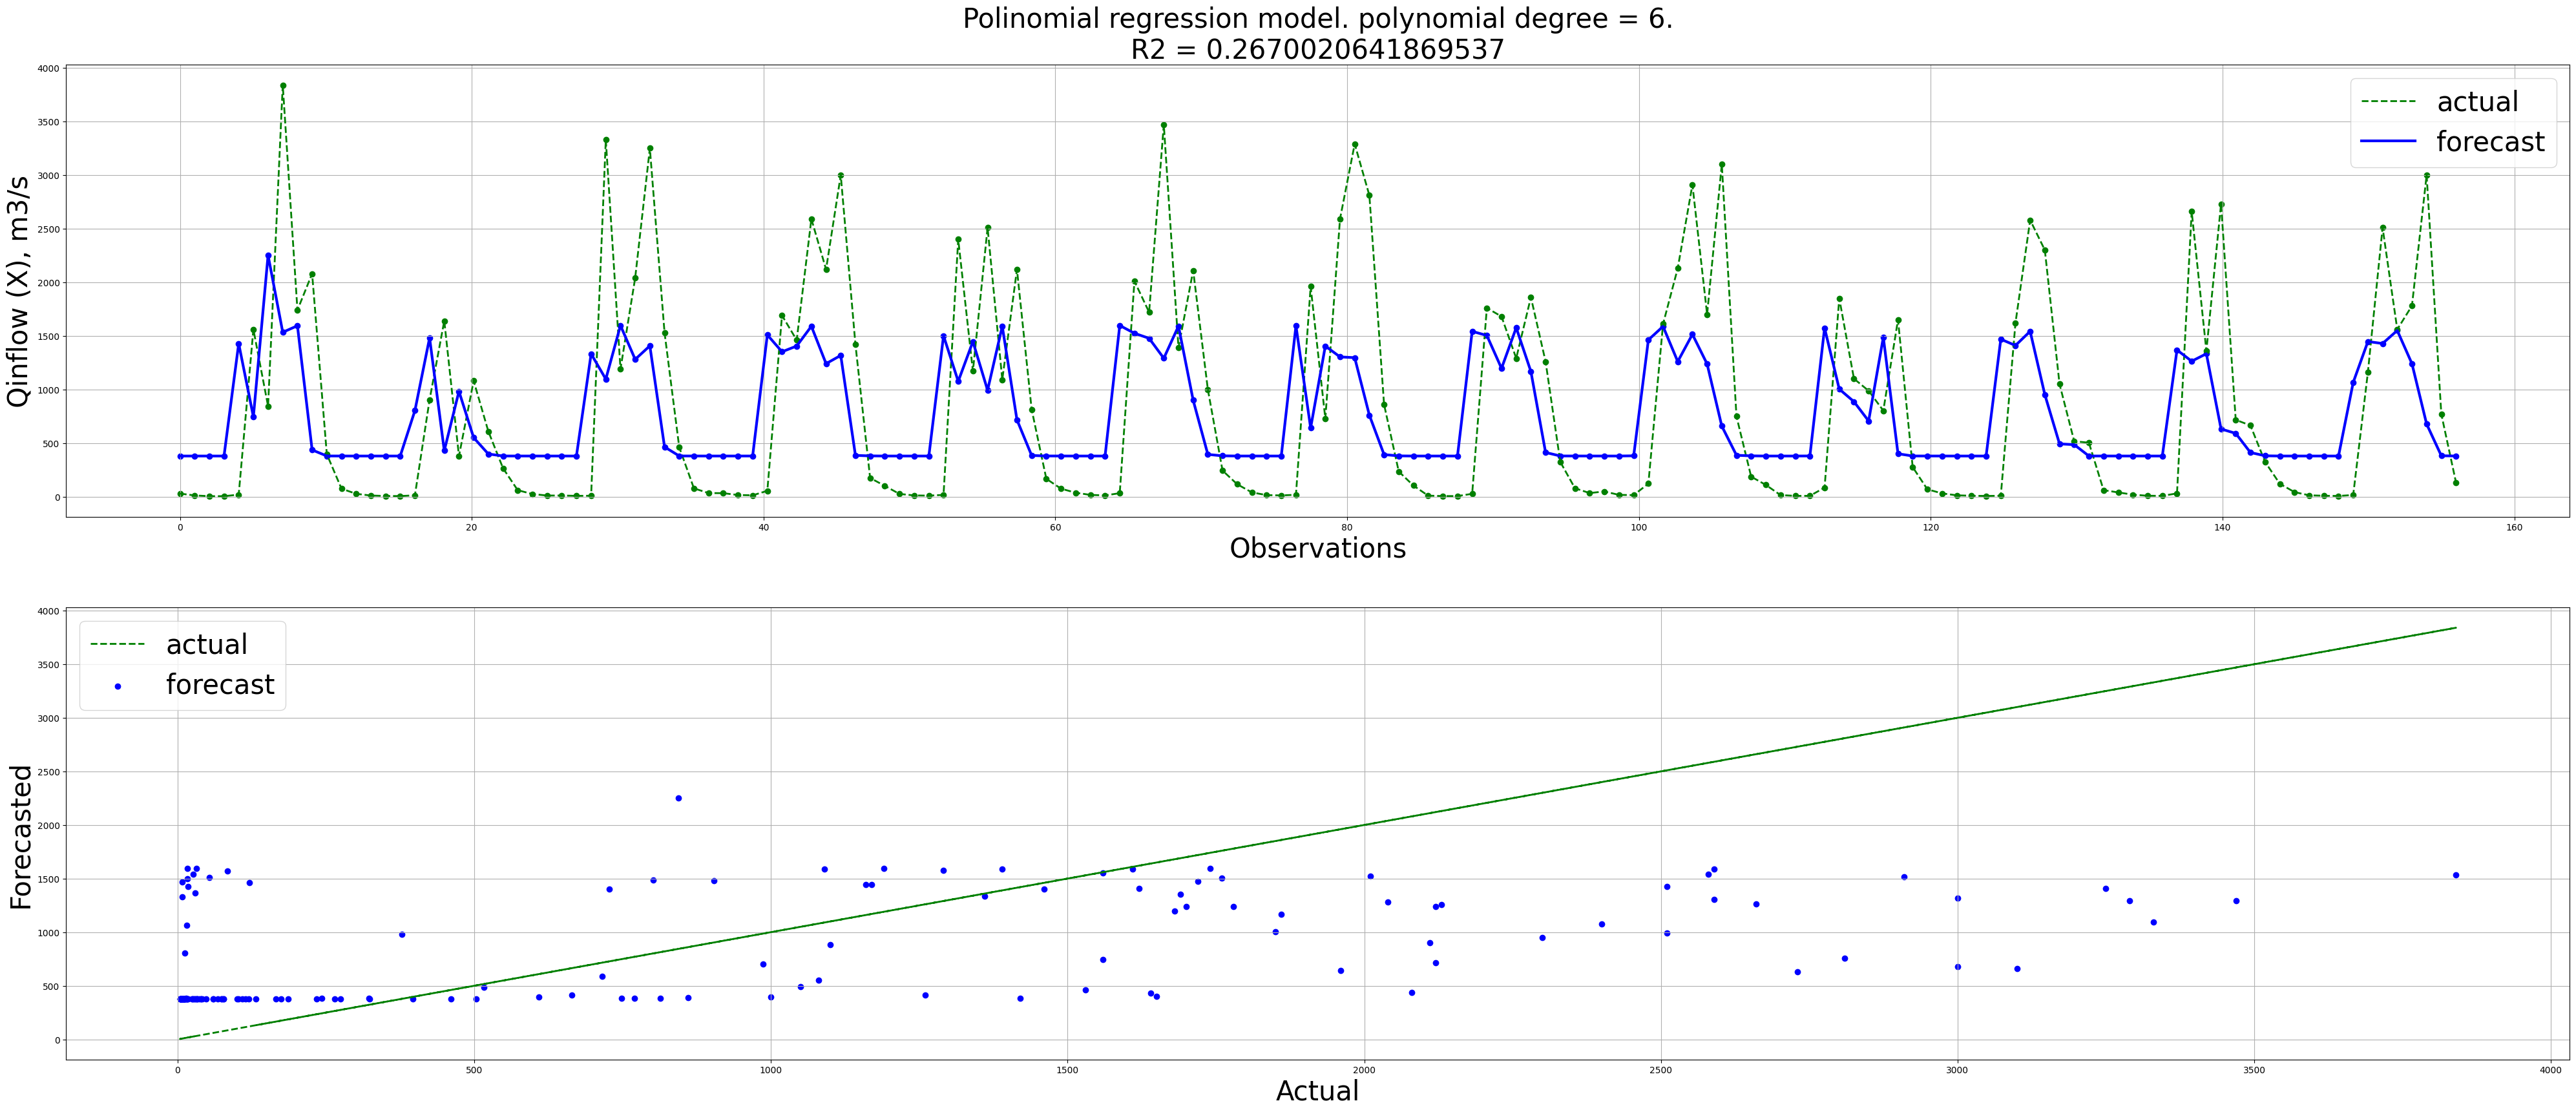

In [ ]:
#Визуализация результатов

x = np.linspace(0, X_test.shape[0], X_test.shape[0])
plt.figure(figsize=(50,20))
plt.subplot(2,1,1)
plt.title(f'Polinomial regression model. polynomial degree = {PF.degree}.\nR2 = {r2_score(y_test,y_pred_pipe)}', fontsize=30)
plt.scatter(x, y_pred_pipe, c='b')
plt.scatter(x, y_test, c='g')
plt.plot(x, y_test, '--g', linewidth=2, label='actual')
plt.plot(x, y_pred_pipe, '-b', linewidth=3, label='forecast')
plt.legend(fontsize=30)
plt.xlabel('Observations', fontsize=30)
plt.ylabel('Qinflow (X), m3/s', fontsize=30)
plt.grid()
plt.subplot(2,1,2)
plt.plot(y_test, y_test, '--g', linewidth=2, label='actual')
plt.scatter(y_test, y_pred_pipe, label='forecast', c='b')
plt.legend(fontsize=30)
plt.xlabel('Actual', fontsize=30)
plt.ylabel('Forecasted', fontsize=30)
plt.grid()

In [ ]:
# Сводная таблица параметров оценки качества прогноза
inflow_data2 = pd.read_excel('/content/drive/MyDrive/Гидроэнергетика/Результаты.xlsx', sheet_name= 'Лист1')
data = pd.DataFrame(data=inflow_data2)
data

,Unnamed: 0,Линейная регрессия,Полиноминальная регрессия (ст. 2),Полиноминальная регрессия (ст. 3),Полиноминальная регрессия (ст. 4),Полиноминальная регрессия (ст. 5),Полиноминальная регрессия (ст. 6)
0,MSE,743977.3804,655795.1639,566077.2432,538304.5850,506319.7256,754238.5496
1,RMSE,862.5412,809.8118,752.3810,733.6924,711.5615,868.4691
2,MAPE,2800.1291,2770.2455,2628.8887,2644.5011,2737.1616,2692.4625
3,R2,0.2770,0.3627,0.4499,0.4769,0.5079,0.2670


## Вывод

**Вывод**
В данной работе были изучены методы линейной и полиномиальной регрессии, применительно к задачам прогнозирования расхода в реке Зея. Получили, что при применении метода линейной регрессии R2 = 0.277. При исследовании полиномиальной регрессии получили, что при увеличении степени полинома до 5 R2 увеличивается, далее начинает уменьшаться. Из полученных результатов следует, что метод полиномиальной регрессии дает более точный результат в отличии от линейного (точность выше в 1,83 раз, при степени полинома 4)